# CMU Data Science Club Sustainability Datathon

**Team Name:** wanting3

**Names: Hermosa Huang, Sophia Mou, Chloris Liu, Annie Yang

**Andrew IDs: yaweny, yimengm, wanting3, ruyul


# Introduction

As the financial industry increasingly relies on AI technologies, the need for sustainable usage of AI has become more urgent. Generative AI models, such as ChatGPT, consume 7 to 10 times more energy compared to traditional data search methods, highlighting the significant environmental challenges posed by AI's resource consumption in data processing and energy use. While AI drives efficiency and reduces operational costs within the finance sector, its environmental impact remains a growing concern. In response to this, the concept of 'Green AI' has emerged, focusing on minimizing the environmental footprint of AI systems while improving their effectiveness. In this context, our team has proposed a solution to promote the adoption of Green AI by switching data storage from on-premises to the Cloud.

# Preliminary Data Processing

To start with the problem, we begin by inspecting the datasets provided. These datasets will help us analyze the environmental impact of AI models and explore potential solutions for promoting Green AI. The first step is to load the necessary libraries and read the datasets into our environment. We'll use common data science packages such as pandas, numpy, seaborn, and matplotlib for data handling and visualization. We also import machine learning tools from sklearn to assist in building models and evaluating their performance.


In [ ]:
### Load Some Common Packages ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

We provide two datasets, you may use one or both or none (we encourage you to find your own datasets either entirely or supplementarily!). Refer to the dataset schemas - the column description tables in the instructions packet - to understand what information is contained in the datasets. Additionally, we have provided some guiding questions but feel free to go beyond those.

In [ ]:
### Download the data ###
!gdown "1Qp3GBd5O4joCNrGc_e8DNimADHCTR56_"
!gdown --id 1m25KGW8b_BpPYv8mA-YvH-ELg--keDQp

Downloading...
From: https://drive.google.com/uc?id=1Qp3GBd5O4joCNrGc_e8DNimADHCTR56_
To: /content/large_scale_ai_models_added_cols.csv
100% 453k/453k [00:00<00:00, 11.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m25KGW8b_BpPYv8mA-YvH-ELg--keDQp
To: /content/bloom_emissions.csv
100% 1.39M/1.39M [00:00<00:00, 16.1MB/s]


In [ ]:
### Load the data ###
df_1 = pd.read_csv("large_scale_ai_models_added_cols.csv")
df_1.head()
#df_1.columns

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN


In [ ]:
df_2 = pd.read_csv("bloom_emissions.csv")
df_2.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,0.912916,0.000027,0.029840,0.0,418.779,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.000802,0.000029,0.029172,0.0,418.763,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.062332,0.000030,0.028206,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.110190,0.000031,0.027648,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.157329,0.000031,0.027152,0.0,425.624,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N


In [ ]:
print(f"Columns of Dataset 1: {df_1.columns}")
print(f"Columns of Dataset 2: {df_2.columns}")

Columns of Dataset 1: Index(['System', 'Domain', 'Task', 'Authors', 'Model accessibility', 'Link',
       'Citations', 'Reference', 'Publication date', 'Organization',
       'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes',
       'Training time (hours)', 'Training hardware', 'Abstract',
       'Country (from Organization)', 'Base model', 'Finetune compute (FLOP)',
       'Finetune compute notes', 'Hardware quantity',
       'Training code accessibility', 'Dataset accessibility',
       'Accessibility notes',
       'Organization categorization (from Organization)',
       'Training power (Watts) ', 'Training energy (kWh) ',
       'Carbon Emissions from training (lb)'],
      dtype='object')
Columns of Dataset 2: Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_powe

In [ ]:
### Preprocess the data and/or Feature Engineer ###
#preprocess ai model data ------------------------------------
# Select relevant features and target variable
target_1 = 'Carbon Emissions from training (lb)'
features_1 = ['Training time (hours)', 'Training dataset size (datapoints)','Training power (Watts) ']
# Drop rows with missing values in selected columns
data_clean_1 = df_1.dropna(subset=features_1 + [target_1])

#preprocess bloom data ----------------------------------------
#drop the irrelevant columns
data = df_2.drop(columns=['timestamp', 'project_name','run_id','country_name','country_iso_code','cloud_provider','cloud_region','os','python_version','cpu_count',	'cpu_model','gpu_count','gpu_model','longitude','latitude','ram_total_size','tracking_mode','on_cloud'], errors='ignore')



# EDA

We start by plotting the correlation matrix for the variables in the dataset bloom_emissions.csv to better understand the relationships between them, focusing on energy and sustainability. Our primary goal is to identify variables with a strong correlation to the emissions_rate, which is a key metric in this context. From the analysis, we observe that duration, gpu_energy, and ram_energy exhibit high correlations with emissions_rate. This finding highlights the importance of these factors in influencing emissions, providing valuable insights for optimizing energy usage and reducing carbon footprints. By narrowing the focus to these variables, we aim to drive meaningful conclusions and actionable strategies and we further anaysis the above factors.

Cross-validated RMSE (Linear Regression): 3.961537642198553e-33
Cross-validated RMSE (Random Forest): 2.823632608213681e-11

Ridge Regression Results:
R-squared (Ridge): 0.9999860029583384


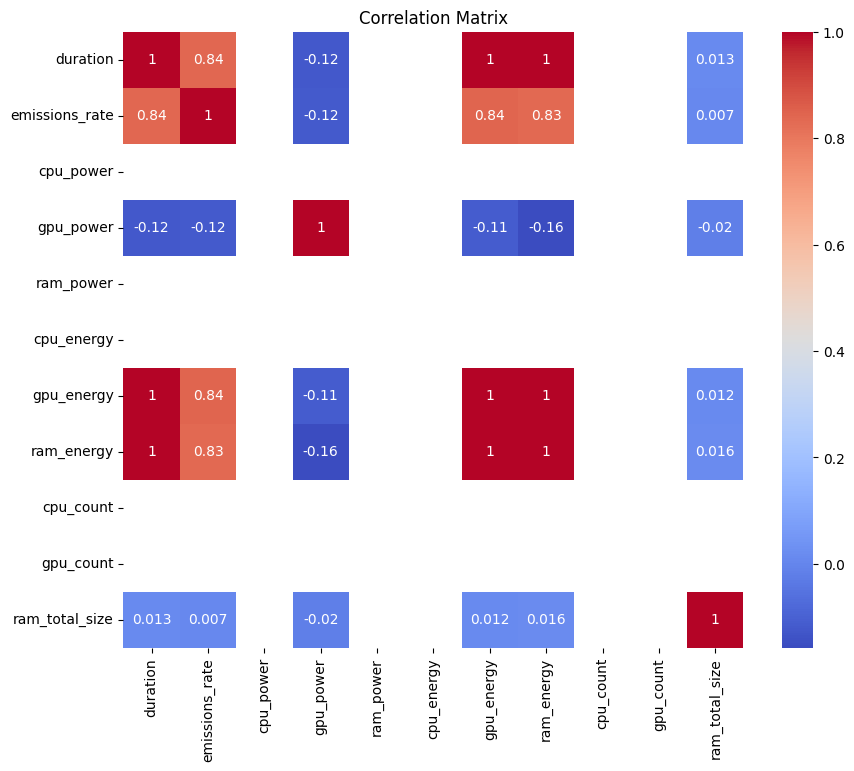


Ridge Regression (PCA) Results:
R-squared (Ridge with PCA): 0.9841329707594698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Linear Regression Evaluation:
  RMSE: 6.355324307908926e-17
  R2: 1.0

Random Forest Evaluation:
  RMSE: 3.7883462931411296e-06
  R2: 0.9999999250110928


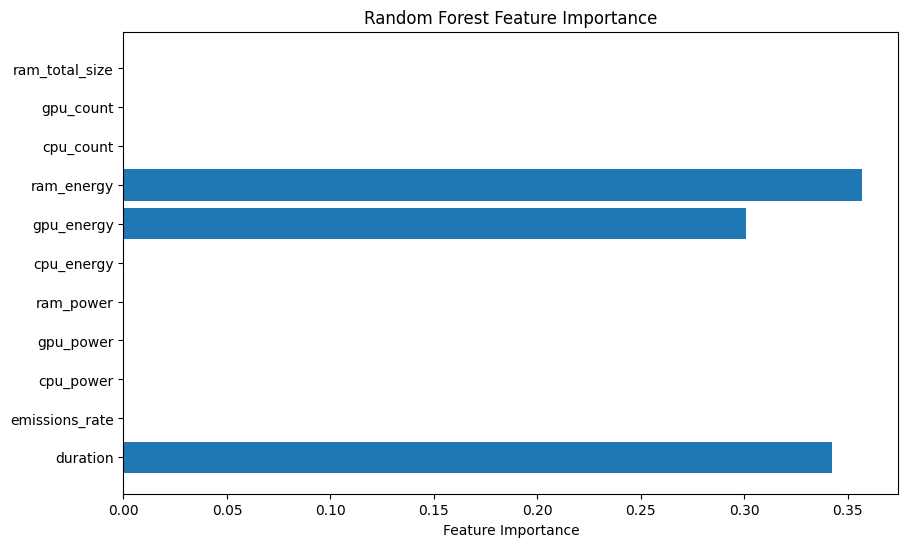

In [ ]:
#bloom data EDA (correlation matrix) ---------------------------------------
target = 'emissions'
features = [
    'duration', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power',
    'cpu_energy', 'gpu_energy', 'ram_energy', 'cpu_count', 'gpu_count', 'ram_total_size'
]
#drop the N/A data and set X, Y
data_cleaned = df_2.dropna(subset=[target])[features + [target]].dropna()
X = data_cleaned[features]
y = data_cleaned[target]

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Linear Regression with cross-validation
lr_model = LinearRegression()
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE (Linear Regression): {-cv_scores_lr.mean()}")

# Perform Random Forest with cross-validation
rf_model = RandomForestRegressor(random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE (Random Forest): {-cv_scores_rf.mean()}")

# Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("\nRidge Regression Results:")
print("R-squared (Ridge):", r2_score(y_test, y_pred_ridge))

# Generate Correlation Matrix
corr_matrix = pd.DataFrame(X_train_scaled, columns=features).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# PCA transformation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Ridge Regression on PCA-transformed data
ridge_model_pca = Ridge(alpha=1.0)
ridge_model_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge_model_pca.predict(X_test_pca)
print("\nRidge Regression (PCA) Results:")
print("R-squared (Ridge with PCA):", r2_score(y_test, y_pred_ridge_pca))

# Evaluate Linear Regression
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Evaluation:")
print(f"  RMSE: {lr_rmse}")
print(f"  R2: {lr_r2}")

# Evaluate Random Forest
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Evaluation:")
print(f"  RMSE: {rf_rmse}")
print(f"  R2: {rf_r2}")

# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

NameError: name 'dataA' is not defined

# Models

For the Bloom dataset, we built two predictive models to estimate the emission rate: The first model is a Linear Regression model using `gpu_energy`, `ram_energy`, and `duration` as features. The model achieved an R^2 score of 0.696, which means that approximately 69.6% of the variability in the emission rate is explained by these features in a linear relationship.
To capture potential non-linear relationships, we developed a Polynomial Regression model, which achieved an improved R^2 score of 0.784. This suggests that the polynomial features better explain the variability in emissions compared to the linear model.
For the AI model dataset, we built models to predict carbon emissions based on variables such as `training_time`, `training_power`, and `training_dataset_size`:
Using a Gradient Boosting model, which is well-suited for capturing non-linear relationships, we achieved a R^2 score of 0.628. This indicates that the model explains approximately 62.8% of the variability in carbon emissions.
To further explore non-linear patterns, we applied Polynomial Regression to the same features. This resulted in an R^2 score of 0.99999, nearly perfect. This indicates that the polynomial model almost entirely captures the relationship between the features and carbon emissions, though it may suggest overfitting to the training data.

In [ ]:
### Fit Model(s) ###
#AI model
X_1 = data_clean_1[features_1]
y_1 = data_clean_1[target_1]

# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

gbr_model_1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model_1.fit(X_train_1, y_train_1)

y_pred_gbr_1 = gbr_model_1.predict(X_test_1)
r2_gbr_1 = r2_score(y_test_1, y_pred_gbr_1)
print(f"R^2 Score with Gradient Boosting: {r2_gbr_1}")

#bloom data model 1 (linear regressions)
target_2 = 'emissions_rate'
features_2 = ['gpu_energy','duration','ram_energy']

# Drop rows with missing values in the selected features and target
df_train_clean = df_train.dropna(subset=features_2 + [target_2])
df_test_clean = df_test.dropna(subset=features_2 + [target_2])

X_train_2 = df_train_clean[features_2]
y_train_2 = df_train_clean[target_2]
X_test_2 = df_test_clean[features_2]
y_test_2 = df_test_clean[target_2]

model = LinearRegression()
model.fit(X_train_2, y_train_2)

y_pred_2 = model.predict(X_test_2)

# R^2 score
r2 = r2_score(y_test_2, y_pred_2)
print(f"R^2 Score: {r2}")

# Model coefficients
coefficients = pd.DataFrame({'Feature': features_2, 'Coefficient': model.coef_})
print("Model Coefficients:")
print(coefficients)

#F test
X_train_2_const = sm.add_constant(X_train_2)

full_model = sm.OLS(y_train_2, X_train_2_const).fit()

f_test_results = []

for feature in features_2:
    reduced_features = [f for f in features_2 if f != feature]
    X_train_reduced = sm.add_constant(X_train_2[reduced_features])

    reduced_model = sm.OLS(y_train_2, X_train_reduced).fit()

    rss_full = full_model.ssr
    rss_reduced = reduced_model.ssr

    df_reduced = len(reduced_features) + 1
    df_full = len(features_2) + 1
    df_feature = df_full - df_reduced
    df_residual = len(y_train_2) - df_full

    # Calculate F-statistic
    f_stat = ((rss_reduced - rss_full) / df_feature) / (rss_full / df_residual)

    # Calculate p-value
    from scipy.stats import f
    p_value = 1 - f.cdf(f_stat, df_feature, df_residual)

    f_test_results.append({
        'Feature': feature,
        'F-Statistic': f_stat,
        'P-Value': p_value
    })

f_test_results_df = pd.DataFrame(f_test_results)

print(f_test_results_df)


#bloom data model 2 (poly regressions) ----------------------------------------
# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_2)
X_test_poly = poly.transform(X_test_2)

# Train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_2)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test_2, y_pred_poly)
print(f"R^2 Score with Polynomial Features: {r2_poly}")

feature_names = poly.get_feature_names_out(features_2)

coefficients_3 = model_poly.coef_
intercept = model_poly.intercept_

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_3})
print("Intercept:", intercept)
print("Coefficients for Polynomial Model:")
print(coeff_df)

R^2 Score with Gradient Boosting: 0.627569334129978
R^2 Score: 0.6960642855663249
Model Coefficients:
      Feature  Coefficient
0  gpu_energy     1.241593
1    duration    -0.000113
2  ram_energy     2.022495
      Feature  F-Statistic       P-Value
0  gpu_energy   370.349305  1.110223e-16
1    duration   319.319900  1.110223e-16
2  ram_energy   182.453686  1.110223e-16
R^2 Score with Polynomial Features: 0.7845940342191334
Intercept: 0.015218398550532322
Coefficients for Polynomial Model:
                 Feature   Coefficient
0             gpu_energy     -2.066305
1               duration     -0.000800
2             ram_energy    105.251081
3           gpu_energy^2    981.461052
4    gpu_energy duration     -0.187536
5  gpu_energy ram_energy   3735.040606
6             duration^2      0.000010
7    duration ram_energy     -0.601748
8           ram_energy^2  13233.961170


In [ ]:
#AI model for polynomial training ----------------------
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_1, y_train_1)

# Predict and evaluate
y_pred_poly_1 = poly_model.predict(X_test_1)
r2_poly_1 = r2_score(y_test_1, y_pred_poly_1)
print(f"R^2 Score with Polynomial Regression: {r2_poly_1}")

poly.fit(X_train_1)

feature_names_poly1 = poly.get_feature_names_out(input_features=X_train_1.columns)

linear_model_1 = poly_model.named_steps['linearregression']

coefficients_poly1 = linear_model_1.coef_
intercept_poly1 = linear_model_1.intercept_
coefficients_poly1=coefficients_poly1[1:]

coeff_df_poly1 = pd.DataFrame({
    'Feature': feature_names_poly1,
    'Coefficient': coefficients_poly1
})

print("Polynomial Coefficients:")
print(coeff_df_poly1)

R^2 Score with Polynomial Regression: 0.9999961353791537
Polynomial Coefficients:
                                             Feature   Coefficient
0                              Training time (hours)  1.132575e-06
1                 Training dataset size (datapoints)  1.735604e-10
2                            Training power (Watts)  -2.178572e-07
3                            Training time (hours)^2  8.499061e-16
4  Training time (hours) Training dataset size (d...  7.693104e-09
5      Training time (hours) Training power (Watts)   8.600063e-04
6               Training dataset size (datapoints)^2 -1.039854e-15
7  Training dataset size (datapoints) Training po...  5.393880e-18
8                          Training power (Watts) ^2 -4.235165e-21


The following graph illustrates the relationship between the training dataset size (in datapoints) and the resulting carbon emissions (in pounds) using a linear regression model. The regression line represents the best linear fit for the data points, indicating the predicted relationship between dataset size and carbon emissions. The R^2 score is 0.141, which suggests that about 14.1% of the variability in carbon emissions is explained by the training dataset size. The coefficient for `Training Dataset Size` is 14.10, meaning that for every additional unit increase in dataset size, the model predicts an increase of approximately 14.10 pounds of carbon emissions.

R^2 Score: 0.14128529249372368
Coefficient for Training dataset size (datapoints): 14.102034819510292
Intercept: 60623679449867.35


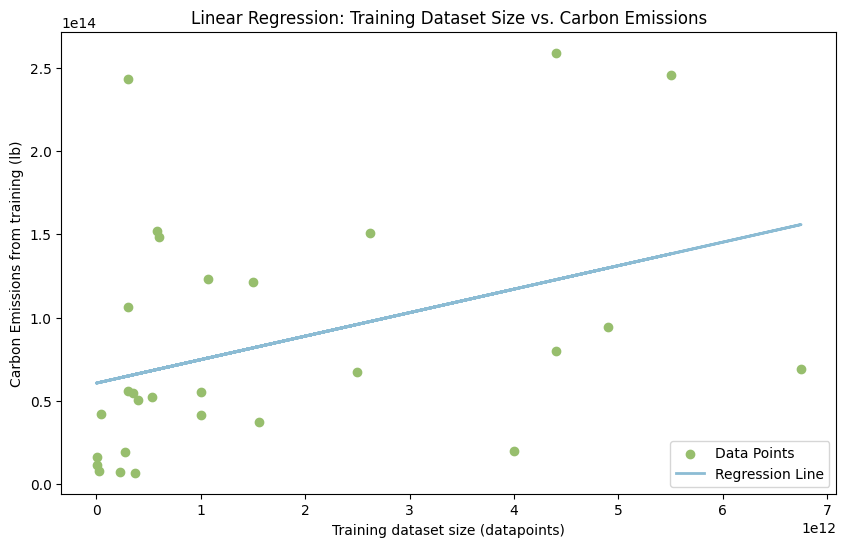

In [ ]:

target = 'Carbon Emissions from training (lb)'
feature = 'Training dataset size (datapoints)'

# Drop rows with missing values in the selected feature and target
data_clean = df_1.dropna(subset=[feature, target])
data_clean = data_clean[data_clean['Carbon Emissions from training (lb)'] < 1e15]

X = data_clean[[feature]]
y = data_clean[target]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2}")

print(f"Coefficient for {feature}: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='#97be6d', label='Data Points')
plt.plot(X, y_pred, color='#8cbcd4', linewidth=2, label='Regression Line')
plt.xlabel('Training dataset size (datapoints)')
plt.ylabel('Carbon Emissions from training (lb)')
plt.title('Linear Regression: Training Dataset Size vs. Carbon Emissions')
plt.legend()
plt.show()


Write some explanations for what your team did in this section. For instance, what kind of model did you use? Why did you feel this approach was the best for this task?

# Solution

We propose a solution to reduce carbon emissions by switching data storage from on-premises to the Cloud. To support this recommendation, we will provide evidence in two stages. First, we will demonstrate how switching to the Cloud can significantly reduce carbon emissions, leveraging its energy-efficient infrastructure. Second, we will illustrate how transitioning to the Cloud can offer long-term benefits, as it becomes increasingly efficient and cost-effective with the growth of data sets. This approach not only addresses immediate sustainability goals but also highlights the scalability and environmental advantages of Cloud storage in the long run.

***Switching to Cloud can significantly reduce carbon emissions***

To proceed with our proposed solution, we begin by identifying the key factors that influence carbon emissions. Based on the exploratory data analysis (EDA) above, we have determined a positive correlation between carbon emissions and variables such as duration, GPU energy, and RAM energy. By transitioning to Cloud storage, we can address these factors effectively.

Duration Reduction:
*   A study by IDC found that organizations using cloud services experienced a 58% faster time-to-market for new products and services.
> https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-023-00424-8
*   Research by Accenture revealed that cloud adopters completed application development and testing 30-50% faster compared to traditional methods.
> https://psico-smart.com/en/blogs/blog-the-impact-of-cloud-computing-on-realtime-data-processing-and-performance-metrics-169762


GPU Energy Consumption:

*   A study by Lawrence Berkeley National Laboratory and Northwestern University demonstrated that moving common software applications to the Cloud could reduce energy usage by 87%.
> https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-023-00424-8
*   Google reported that its cloud GPUs are up to 30% more energy-efficient than standard on-premises data center servers.
> https://psico-smart.com/en/blogs/blog-the-impact-of-cloud-computing-on-realtime-data-processing-and-performance-metrics-169762


RAM Energy Consumption:
*   The Lawrence Berkeley National Laboratory study also highlighted that the potential 87% reduction in energy usage applies across all computing resources, including RAM.
> https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-023-00424-8

*   Microsoft Azure reported that its cloud services could reduce energy consumption by up to 93% compared to traditional on-premises solutions.
These findings underline how adopting Cloud solutions can significantly lower carbon emissions by addressing key energy-intensive factors, making it a sustainable and efficient choice for the future.
> https://www.hivenet.com/post/cost-efficiency-of-distributed-cloud-is-it-really-cheaper



To further highlight and support our strategy of switching from on-premises to Cloud storage, we conducted a case study on AWS and developed a theoretical prediction based on the existing data. This analysis emphasizes the potential benefits of transitioning to Cloud services, showcasing how it can significantly reduce carbon emissions while enhancing efficiency.

By leveraging AWS as a case study, we aim to provide concrete evidence to validate our proposed strategy and demonstrate its long-term sustainability advantages. In this analysis, we examine the environmental benefits of data migration to AWS, based on a case study conducted by Accenture. These visualizations showcase the impact of moving from traditional on-premises data centers to AWS in different global regions, emphasizing reductions in carbon emissions and enhancements in energy efficiency. The first graph illustrates the percentage reduction in carbon emissions intensity across four regions—US & Canada, Europe, Asia Pacific, and Brazil—comparing three scenarios: the decrease in emissions from on-premises to AWS Lift-and-Shift (a direct migration without further optimization), from AWS Lift-and-Shift to AWS-Optimized (additional reductions achieved through optimization), and from on-premises directly to AWS-Optimized (maximizing reductions with full optimization). Each scenario is color-coded to emphasize the varying levels of emissions reduction across configurations and regions.


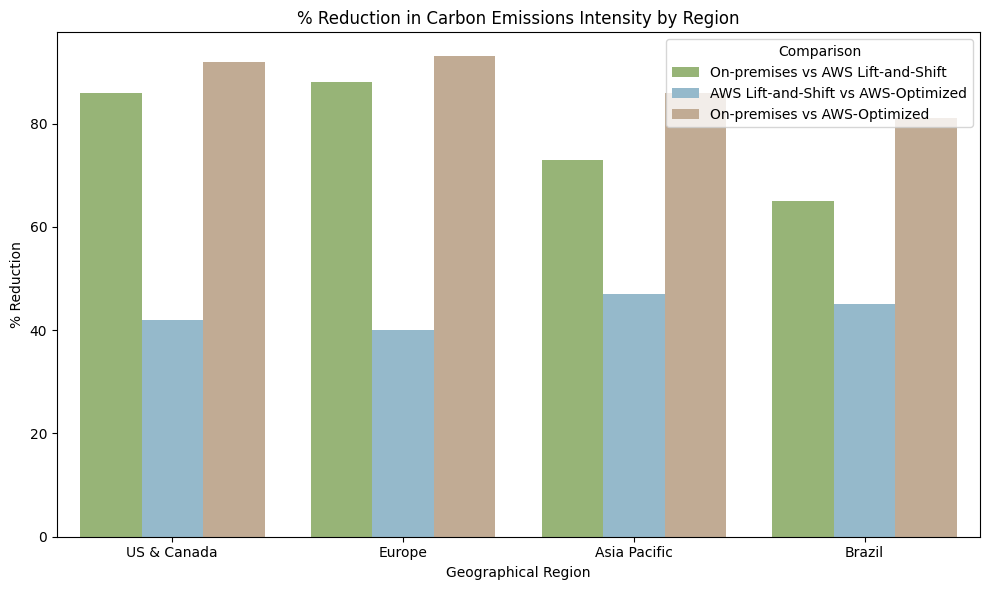

In [ ]:
#Data Source: https://sustainability.aboutamazon.com/carbon-reduction-aws.pdf
data = {
   'Geographical Region': ['US & Canada', 'Europe', 'Asia Pacific', 'Brazil'],
   'On-premises vs AWS Lift-and-Shift': [86, 88, 73, 65],
   'AWS Lift-and-Shift vs AWS-Optimized': [42, 40, 47, 45],
   'On-premises vs AWS-Optimized': [92, 93, 86, 81],
   'Energy efficiency factor': [1.8, 1.9, 2.3, 2.5]
}


df = pd.DataFrame(data)
custom_palette = ["#97be6d", "#8cbcd4", "#c9ab8c"]


df_melted = df.melt(id_vars='Geographical Region', value_vars=[
   'On-premises vs AWS Lift-and-Shift', 'AWS Lift-and-Shift vs AWS-Optimized', 'On-premises vs AWS-Optimized'
], var_name='Comparison', value_name='% Reduction')


plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Geographical Region', y='% Reduction', hue='Comparison', palette=custom_palette)
plt.title('% Reduction in Carbon Emissions Intensity by Region')
plt.xlabel('Geographical Region')
plt.ylabel('% Reduction')
plt.legend(title='Comparison')
plt.tight_layout()
plt.show()


This graph highlights the energy efficiency factor for each region, showing how much more energy-efficient AWS is relative to on-premises infrastructure. For instance, an efficiency factor of 1.8 in US & Canada signifies that AWS is 1.8 times more energy-efficient. Collectively, these visualizations underscore the environmental benefits of adopting AWS, illustrating significant reductions in carbon emissions and notable gains in energy efficiency across the examined regions.


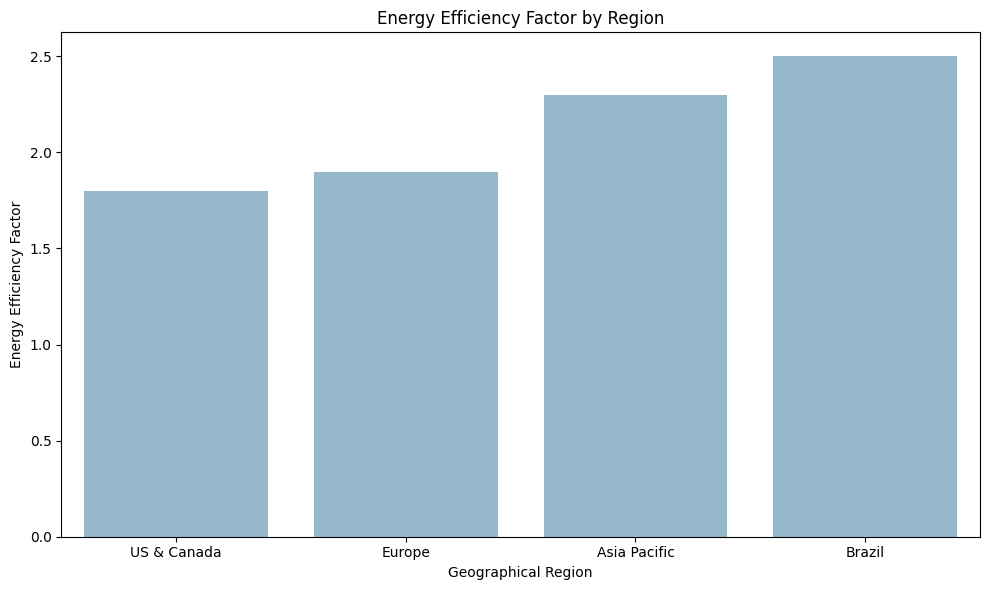

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Geographical Region', y='Energy efficiency factor', color="#8cbcd4")
plt.title('Energy Efficiency Factor by Region')
plt.xlabel('Geographical Region')
plt.ylabel('Energy Efficiency Factor')
plt.tight_layout()
plt.show()

The following code serves as a prediction model for estimating carbon emissions for both on-premises and Cloud environments.

The variable co_emissions_factor, set at 0.995, represents the carbon dioxide (CO2) emissions factor, indicating that for every kilowatt-hour (kWh) of electricity consumed, 0.995 kg of CO2 is emitted. This factor varies depending on the energy mix of the electricity grid, with lower values reflecting a cleaner energy mix that incorporates more renewable sources.

The on_prem_pue value of 1.59 refers to Power Usage Effectiveness (PUE), a metric that evaluates the energy efficiency of a data center. A PUE of 1.59 means that for every unit of energy consumed by IT equipment, an additional 0.59 units are used for supporting infrastructure, such as cooling and lighting. This indicates that on-premises data centers are relatively less energy-efficient. In contrast, the cloud_pue value of 1.1 reflects the PUE for cloud data centers, which is significantly lower. This reduced PUE highlights the superior energy efficiency of cloud environments achieved through advanced cooling technologies, optimized server utilization, and economies of scale.

In [ ]:
import matplotlib.pyplot as plt

def calculate_emissions(num_servers, kwh_per_server, cloud_reduction_factor):
    co_emissions_factor = 0.995  # https://www.nutanix.dev/2023/05/04/digging-into-data-center-efficiency-pue-and-the-impact-of-hci/
    on_prem_pue = 1.59  # https://watershed.com/blog/carbon-in-the-cloud
    cloud_pue = 1.1  # https://www.device42.com/blog/2023/02/23/maximize-data-center-energy-efficiency-by-calculating-and-improving-power-usage-effectiveness-pue/

    # Calculate total energy consumption
    total_kwh = num_servers * kwh_per_server

    # Calculate emissions for on-premises
    on_prem_emissions = total_kwh * on_prem_pue * co_emissions_factor

    # Calculate emissions for cloud
    cloud_emissions = total_kwh * cloud_pue * co_emissions_factor * cloud_reduction_factor

    return on_prem_emissions, cloud_emissions



The following part illustrates the stark difference in carbon emissions (measured in kilograms of CO₂ equivalent, kg CO₂e) between on-premises data storage and cloud computing. The emissions for on-premises data centers are significantly higher, totaling 569,538 kg CO₂e. This reflects the inefficiencies often associated with managing on-site data storage, including underutilized servers and higher energy consumption. In contrast, cloud-based operations produce only 189,129.6 kg CO₂e, showcasing their greater energy efficiency and sustainability. Cloud providers often utilize optimized infrastructure, renewable energy sources, and shared resources to minimize environmental impact.

The reduction in emissions achieved by moving from on-premises to the cloud is substantial, amounting to 380,408.4 kg CO₂e, which translates to a ~67% reduction. This highlights the environmental benefits of cloud computing.

These results underscore the importance of transitioning to cloud-based solutions for industries looking to reduce their carbon footprint and meet sustainability goals. Organizations can leverage cloud providers’ investments in energy efficiency and renewable energy to align their operations with global carbon reduction targets.

This comparison clearly demonstrates the potential of cloud computing to drive significant environmental improvements while maintaining operational efficiency. This graph serves as compelling evidence in favor of adopting cloud-based technologies for both economic and environmental benefits.

On-premises emissions: 569538.00 kg CO2e
Cloud emissions: 189129.60 kg CO2e


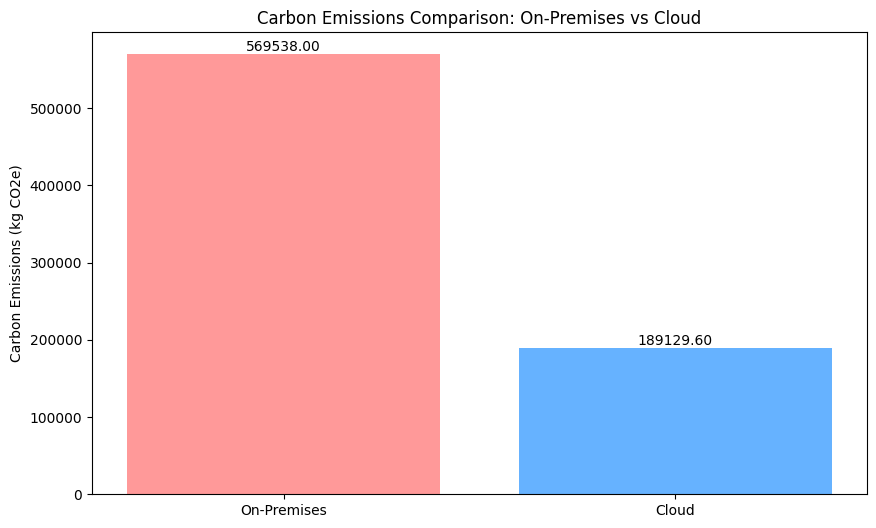

In [ ]:
def plot_emissions_comparison(on_prem, cloud):
    labels = ['On-Premises', 'Cloud']
    emissions = [on_prem, cloud]
    colors = ['#FF9999', '#66B2FF']

    plt.figure(figsize=(10, 6))
    plt.bar(labels, emissions, color=colors)
    plt.title('Carbon Emissions Comparison: On-Premises vs Cloud')
    plt.ylabel('Carbon Emissions (kg CO2e)')
    plt.text(0, on_prem, f'{on_prem:.2f}', ha='center', va='bottom')
    plt.text(1, cloud, f'{cloud:.2f}', ha='center', va='bottom')

    reduction_percentage = ((on_prem - cloud) / on_prem) * 100
    plt.show()

# Example usage
num_servers = 200
kwh_per_server = 1800
cloud_reduction_factor = 0.48

on_prem_emissions, cloud_emissions = calculate_emissions(num_servers, kwh_per_server, cloud_reduction_factor)

print(f"On-premises emissions: {on_prem_emissions:.2f} kg CO2e")
print(f"Cloud emissions: {cloud_emissions:.2f} kg CO2e")

plot_emissions_comparison(on_prem_emissions, cloud_emissions)

*A Scalable and Energy-Efficient Solution for Growing Datasets*


In the long run, as datasets continue to grow in size, switching to the cloud becomes an increasingly beneficial strategy due to its superior energy efficiency and scalability. Evidence from the provided analysis highlights that as computational load increases, cloud infrastructure maintains a high load factor and better energy proportionality. Specifically, increasing the data size by four times in the cloud environment only requires a 1.7 times increase in power usage, showcasing the cloud's ability to handle larger datasets with minimal energy growth. This efficiency is demonstrated by the linear regression analysis, which shows a manageable rise in carbon emissions as training dataset sizes grow. These findings underscore the long-term advantages of cloud computing in reducing power consumption and environmental impact, making it an ideal solution for handling future data growth.

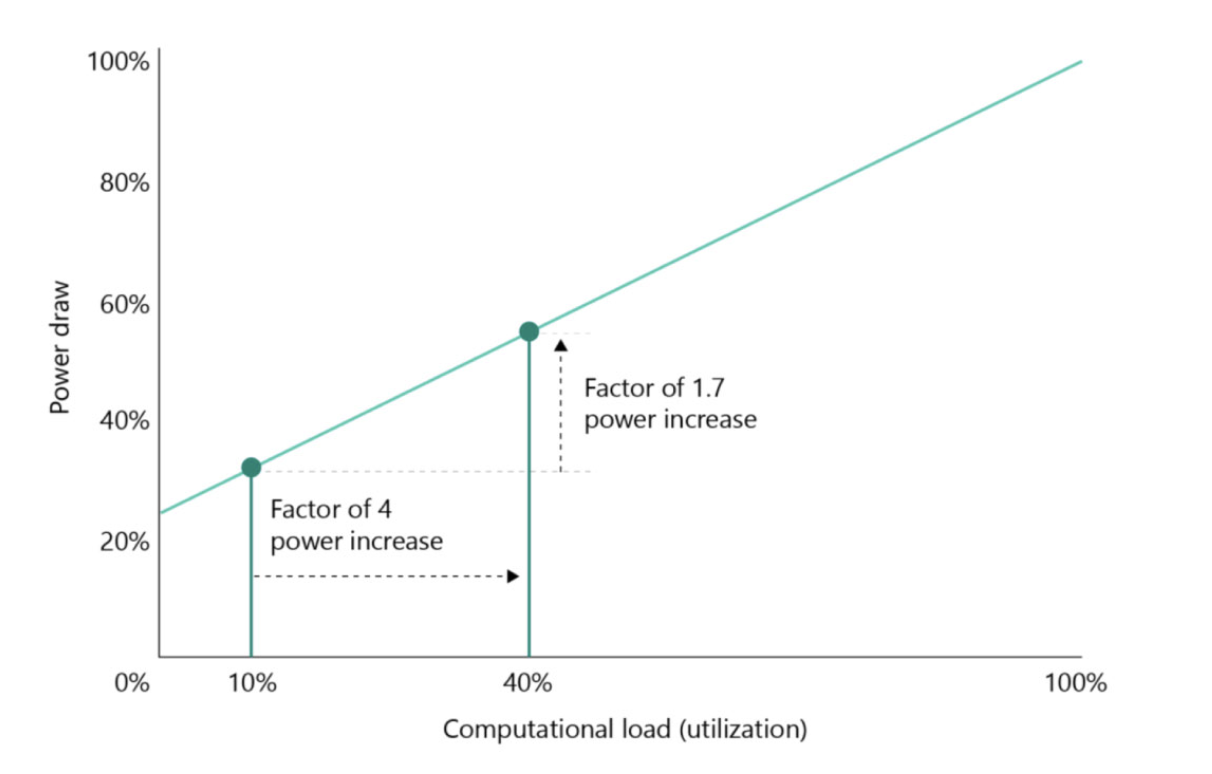

Sources:

> https://www.thoughtworks.com/insights/articles/cloud-native-sustainability


In [ ]:
### Make and Interpret Predictions ###

# Future Projection


Looking ahead, our predictions imply that AI in 10 or 20 years will rely heavily on scalable and sustainable computing solutions like cloud infrastructure. The continuous growth of AI-related data, models, and computational requirements will demand energy-efficient systems to prevent a disproportionate rise in carbon emissions. Present trends, such as advancements in cloud computing, renewable energy integration, and energy-efficient hardware, suggest that AI can indeed be a sustainable venture if accompanied by deliberate environmental considerations and infrastructural investments.

In the context of the finance industry, this scalability and efficiency become even more critical. The industry generates vast amounts of data daily, from trading algorithms to customer insights, and relies heavily on real-time analysis to remain competitive. Our hypotheses are supported by evidence that cloud computing not only reduces carbon footprints but also ensures cost-effective and scalable data processing, making it an ideal choice for financial institutions aiming to embrace AI-driven solutions while committing to sustainability.

In [ ]:
# EDA



> Add blockquote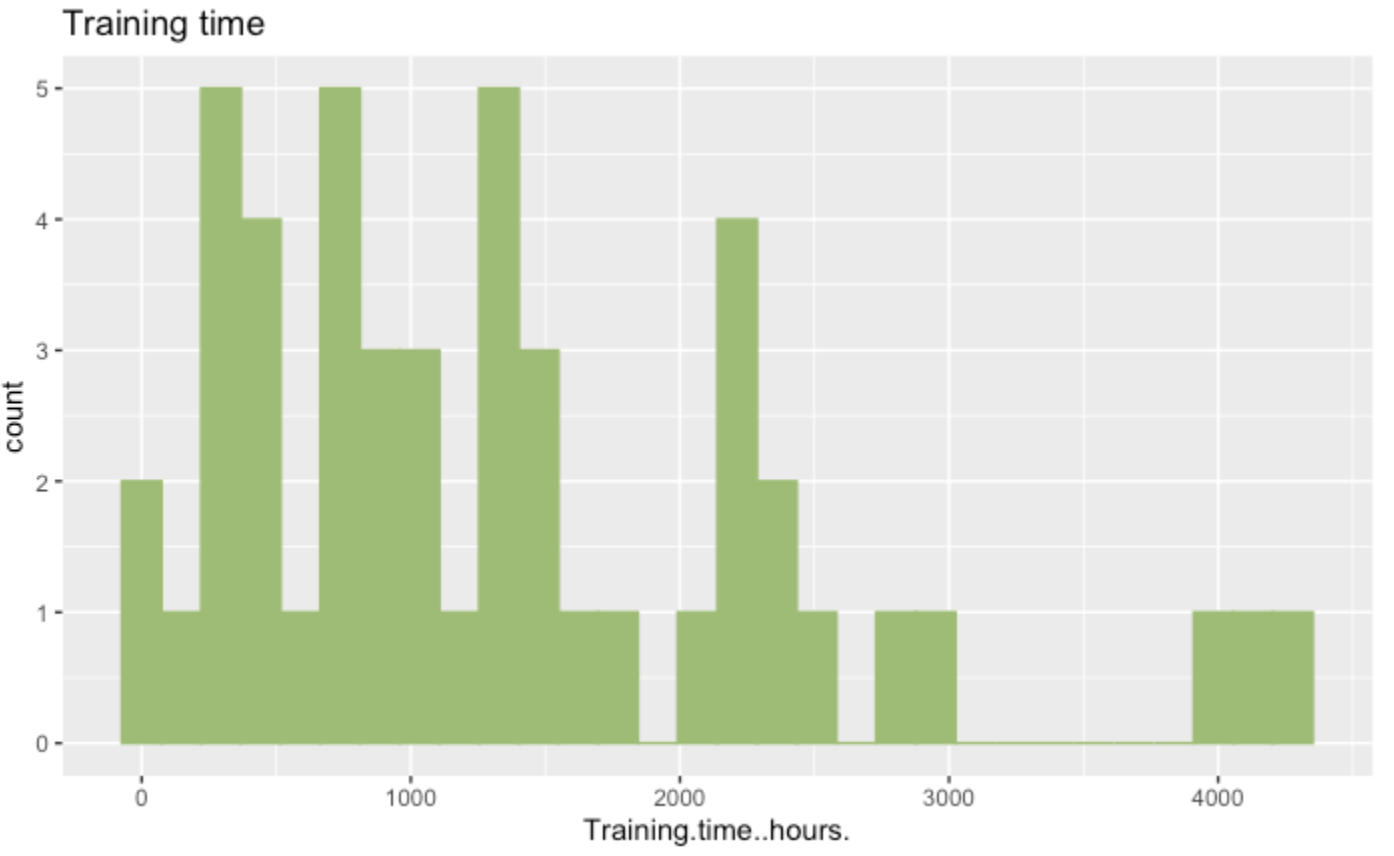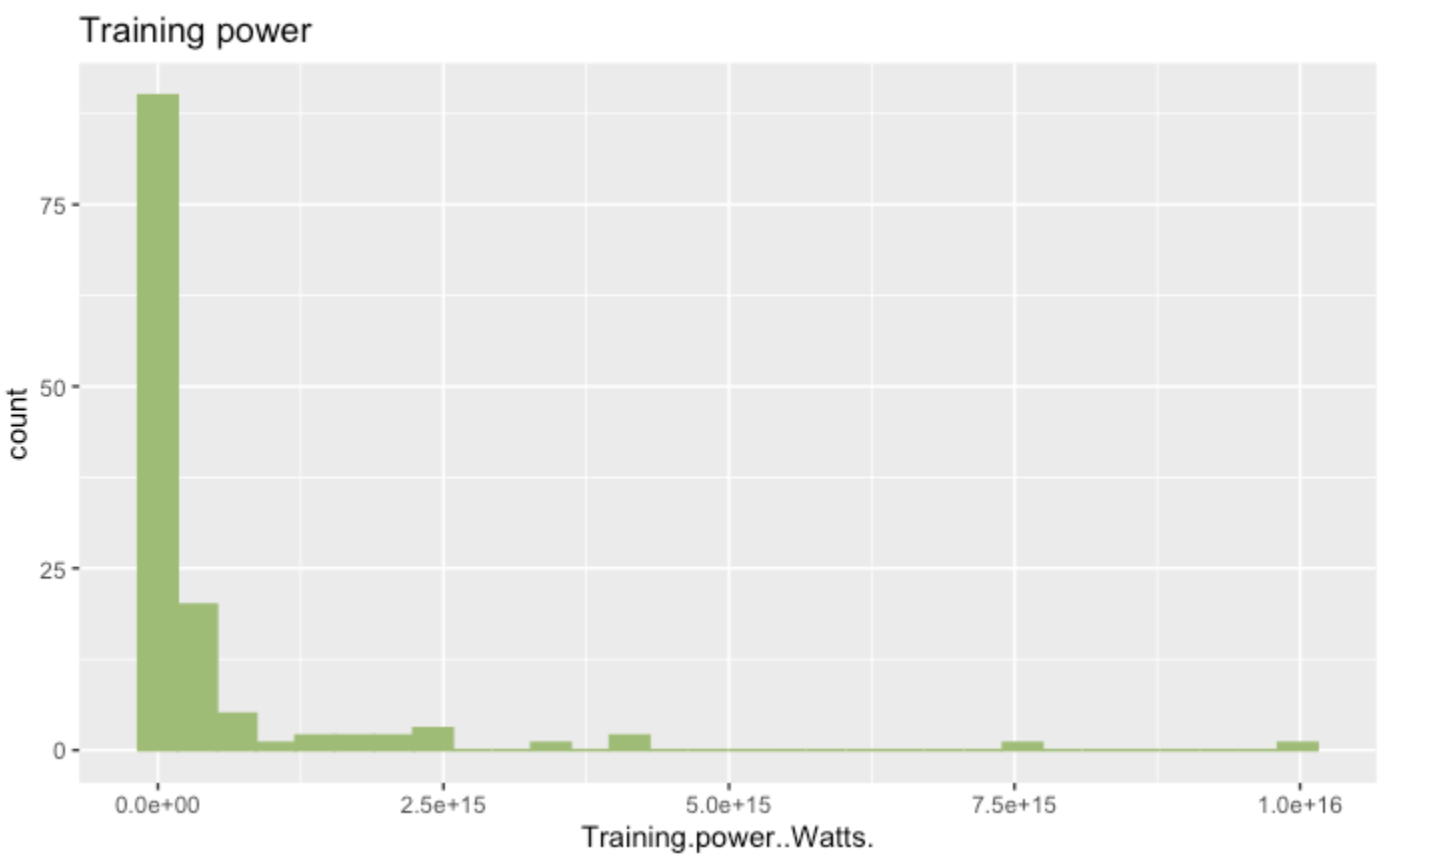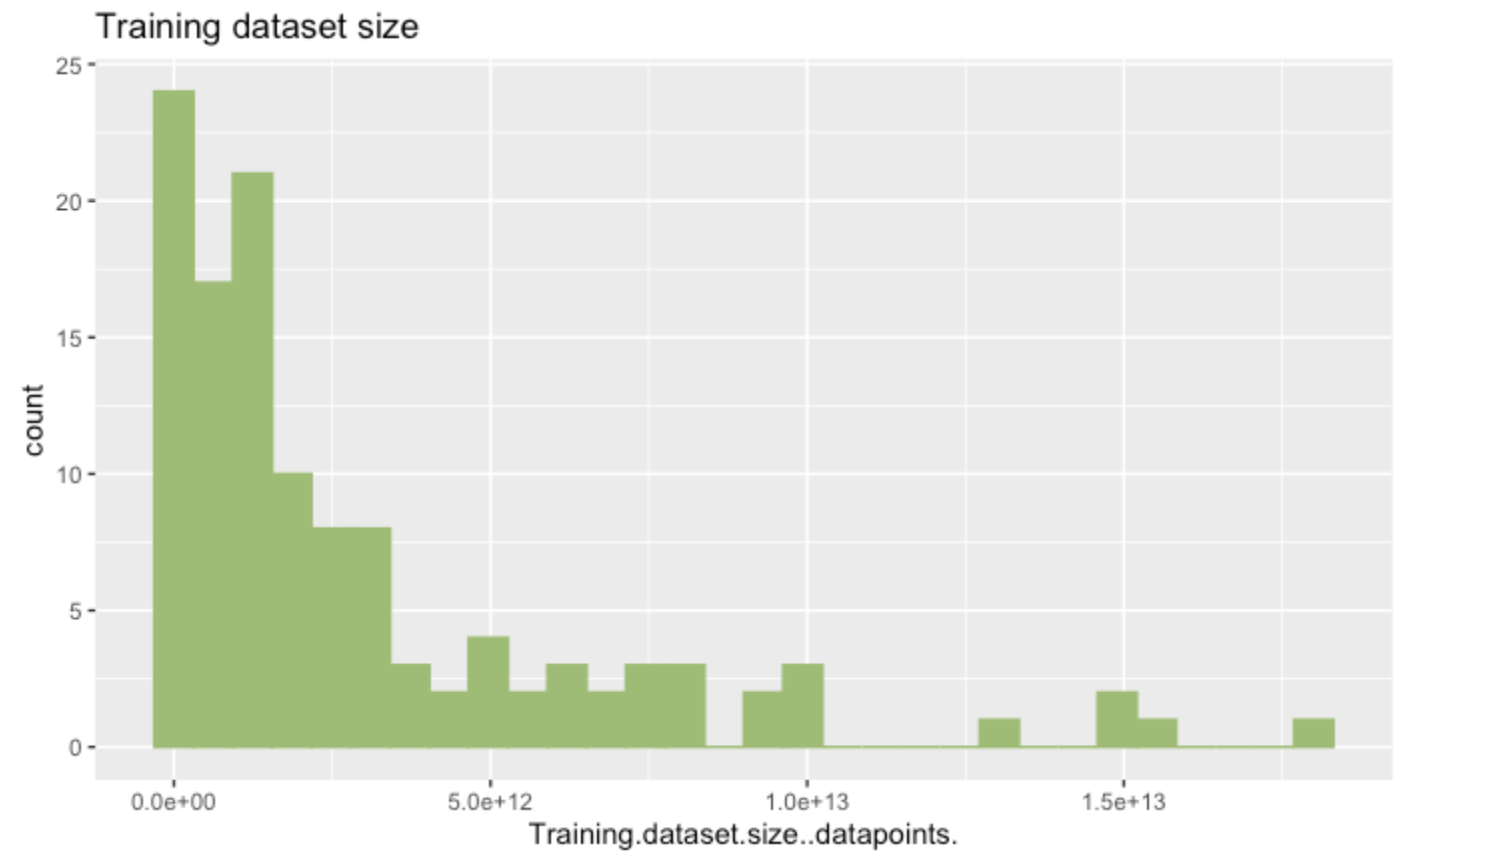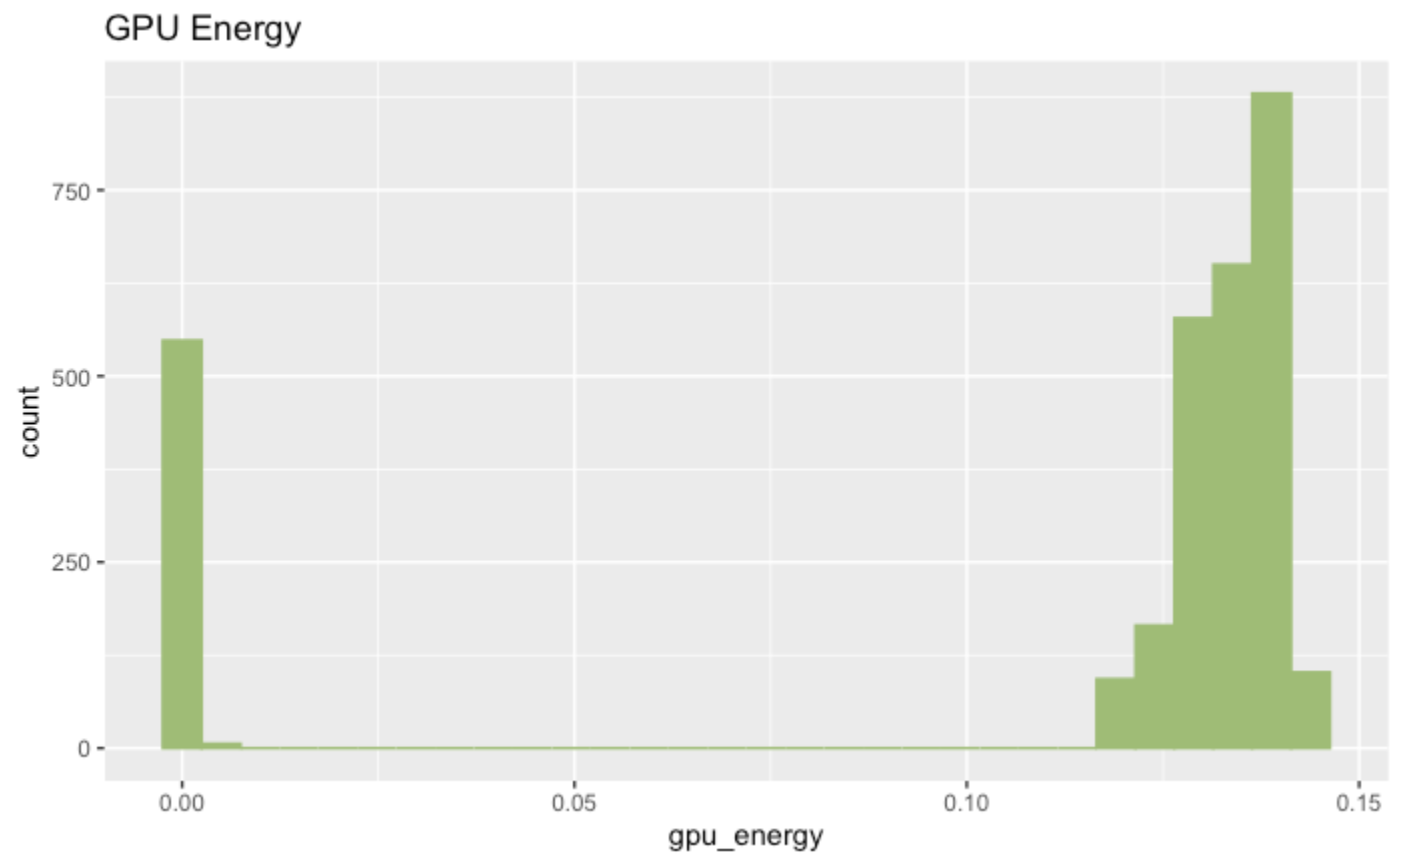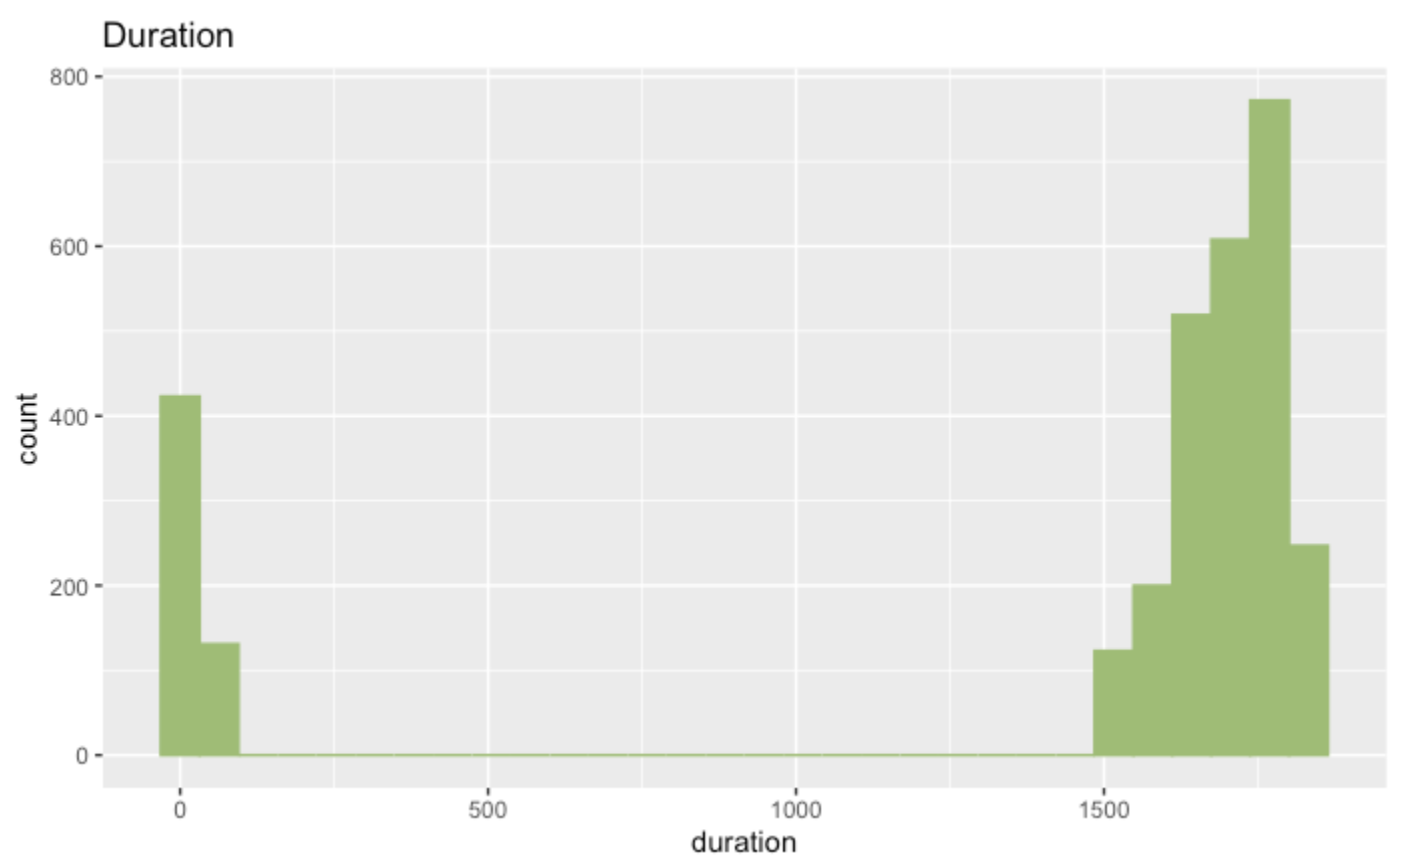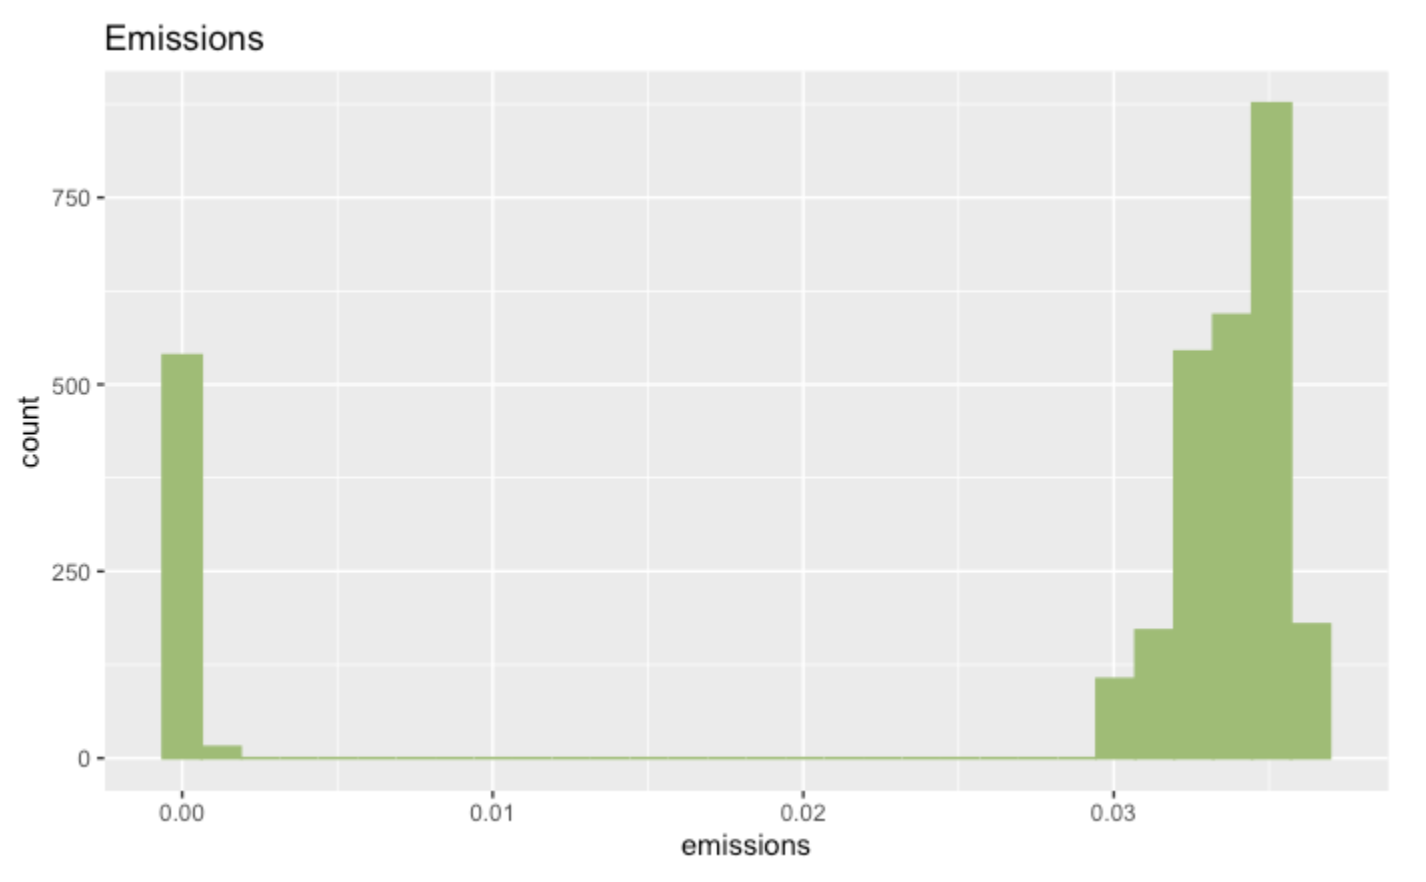

